In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=np.linspace(-5.0,5.0,100)
y=np.sqrt(10**2-x**2)

In [3]:
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [4]:
x1=np.linspace(-5.0,5.0,100)
y1=np.sqrt(5**2-x1**2)

In [5]:
x1=np.hstack([x1,-x1])
y1=np.hstack([y1,-y1])

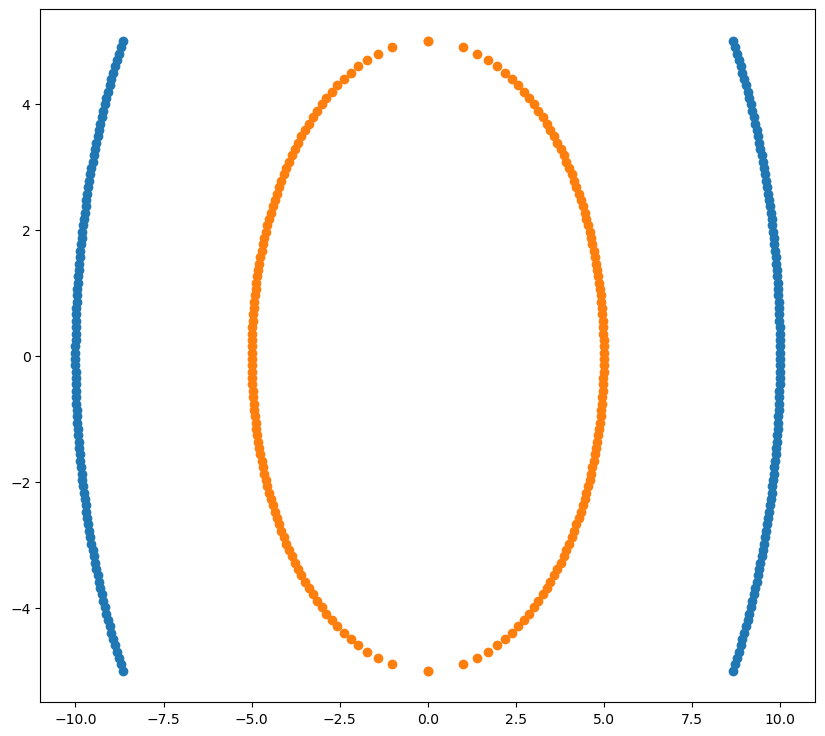

In [6]:
plt.figure(figsize=(10,9))
plt.scatter(y,x)
plt.scatter(y1,x1)

In [11]:
import pandas as pd
df1= pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2=pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1

In [24]:
df= pd.concat([df1, df2], ignore_index=True)


In [25]:
df

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0
...,...,...,...
395,-1.969049,-4.59596,1
396,-1.714198,-4.69697,1
397,-1.406908,-4.79798,1
398,-0.999949,-4.89899,1


In [44]:
#Independent and Dependent features
X=df.iloc[:,:2]#Independent Features
Y=df['Y']#Dependent Features

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=11)

In [47]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((320, 2), (80, 2), (320,), (80,))

In [49]:
#We find the components of the polynimal kernels
df['X1_Squared']=df['X1']**2
df['X2_Squared']=df['X2']**2
df['X1*X2']=(df['X1']*df['X2'])

In [50]:
df

,X1,X2,Y,X1_Squared,X2_Squared,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009
...,...,...,...,...,...,...
395,-1.969049,-4.59596,1,3.877155,21.122845,9.049671
396,-1.714198,-4.69697,1,2.938476,22.061524,8.051537
397,-1.406908,-4.79798,1,1.979390,23.020610,6.750316
398,-0.999949,-4.89899,1,0.999898,24.000102,4.898740


In [52]:
#Independent Features and Dependent Features


x=df[['X1', 'X2',  'X1_Squared', 'X2_Squared', 'X1*X2']]
y=df[['Y']]

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=11)

In [55]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((320, 5), (80, 5), (320, 1), (80, 1))

In [58]:
df.columns

Index(['X1', 'X2', 'Y', 'X1_Squared', 'X2_Squared', 'X1*X2'], dtype='object')

In [78]:
fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2', color='Y')

In [77]:
fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2', color='Y')
fig

In [83]:
fig1= px.scatter_3d(df,x='X1_Squared', y='X2_Squared', z='X1*X2', color='Y')
fig1.show()

In [93]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
y_predict=svc.predict(x_test)
score=accuracy_score(y_test,y_predict)
print(score)


1.0


C:\Users\kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

